## MODEL 2: POLYNOMIAL REGRESSION (SYNTHETIC DATA)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# create synthetic data

In [10]:
np.random.seed(0)

In [16]:
X = np.linspace(0, 10, 50).reshape(-1,1)
y = 2 * X.flatten() ** 2 + 3 * X.flatten() + 5 + np.random.randn(50) * 10

In [22]:
z = np.linspace(0, 10, 50)
z = z.reshape(-1,1)
z.shape

(50, 1)

In [24]:
X.shape

(50, 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [32]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [36]:
y_predict = model.predict(X_test_poly)

In [38]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [40]:
mse

89.16235695455866

In [50]:
r2

0.9779125001763692

In [54]:
X_line = np.linspace(X_test.min(), X_test.max(), 200).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line = model.predict(X_line_poly)

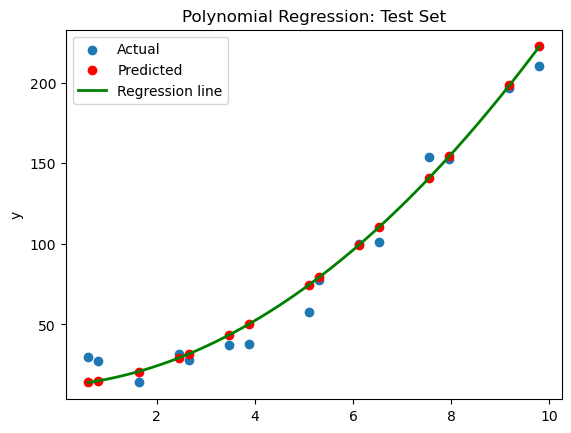

In [61]:
plt.scatter(X_test, y_test, label = 'Actual')
plt.scatter(X_test, y_predict , color = 'red', label = 'Predicted')
plt.plot(X_line, y_line, color = 'green', linewidth = 2, label = 'Regression line')
plt.ylabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression: Test Set')
plt.legend()
plt.show()